# Гомологичное моделирование комплекса белка с лигандом

In [16]:
import sys  
import modeller 
import _modeller
import modeller.automodel

In [17]:
env=modeller.environ()
env.io.hetatm=True


                         MODELLER 9.24, 2020/04/06, r11614

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2020 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Linux kodomo 3.16.0-6-amd64 x86_64
Date and time of compilation    

In [18]:
alignm=modeller.alignment(env)

In [19]:
#добавим последовательность для моделирования и структуру известного лизоцима форели
alignm.append(file='Q6QGP7.fasta', align_codes='all',alignment_format='FASTA')

#создадим модель
mdl = modeller.model(env, file='1lmp.pdb', model_segment=('FIRST:'+'A', 'LAST:'+'A'))

#и добавим в выравнивание
alignm.append_model(mdl, atom_files='1lmp.pdb', align_codes='1lmp')

In [20]:
#поправим идентификаторы
alignm[0].code = 'ENLYS_BPT5' #этот белок был использован
alignm[1].code = '1lmp'

In [21]:
#делаем выравнивание и сохраняем
alignm.salign()
alignm.write(file='all_in_one.ali', alignment_format='PIR')


SALIGN_____> adding the next group to the alignment; iteration    1


In [22]:
#посмотрим на получившееся выравнивание
! cat all_in_one.ali


>P1;ENLYS_BPT5
sequence::     : :     : :::-1.00:-1.00
MSFKFGKNSEKQLATVKPELQKVARRALELSPYDFTIVQGIRTVAQSAQNIANGTSFLKDPSKSKHITGDAIDFA
PYINGKIDWNDLEAFWAVKKAFEQAGKELGIKLRFGADWNASGDYHDEIKRGTYDGGHVELV*

>P1;1lmp
structureX:1lmp.pdb:   1 :A:+129 :A:MOL_ID  1; MOLECULE  LYSOZYME; CHAIN  A; SYNONYM  MUCOPEPTIDE N-ACETYLMURAMYLHYDROLASE; EC  3.2.1.17:MOL_ID  1; ORGANISM_SCIENTIFIC  ONCORHYNCHUS MYKISS; ORGANISM_COMMON  RAINBOW TROUT; ORGANISM_TAXID  8022; ORGAN  KIDNEY: 2.00: 0.16
---KVYDRCELARALKASGMDGYAGNSLPNWVCLSKWESSYNTQATNRNTDGSTDYGIFQINSRYWCDDGRTPGA
KNVCGIRCSQLLTDDLTVAIRCAKRVVLDPNGIGAWVAWRLHCQNQDLRSYVAGCG-----V*


In [23]:
#построим модель и выбираем объект для моделирования 
s = alignm[0]
pdb = alignm[1]

print(s.code, pdb.code)

ENLYS_BPT5 1lmp


In [24]:
#создаем объект automodel и проводим моделирование
a = modeller.automodel.automodel(env, alnfile='all_in_one.ali', knowns = pdb.code, sequence = s.code )

a.name='mod'+s.code
a.starting_model = 1
a.ending_model = 2
a.make()


check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
END OF TABLE
read_to_681_> topology.submodel read from topology file:        3
mdtrsr__446W> A potential that relies on one protein is used, yet you have at
              least one known structure available. MDT, not library, potential is used.
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies
condens_443_> Restraints marked for deletion were removed.
              Total number of restraints before, now:    11073    10114


>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      137
Number of all, selected real atoms                :     10



>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      137
Number of all, selected real atoms                :     1081    1081
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :    10114   10114
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):     2436
Dynamic pairs routine                             : 2, NATM x NATM cell sorting
Atomic shift for contacts update (UPDATE_DYNAMIC) :    0.390
LENNARD_JONES_SWITCH                              :    6.500   7.500
COULOMB_JONES_SWITCH                              :    6.500   7.500
RESIDUE_SPAN_RANGE                                :        0   99999
NLOGN_USE                                         :       15
CONTACT_SHELL                                     :    4.000
DYNAMIC_P

ENLYS_BPT5.B99990001.pdb is green


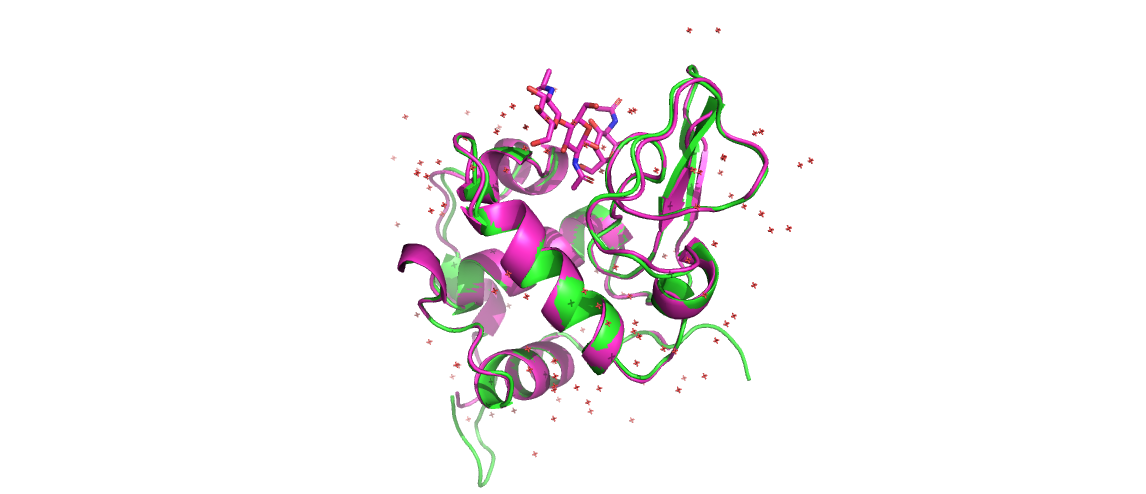

ENLYS_BPT5.B99990002.pdb is cyan


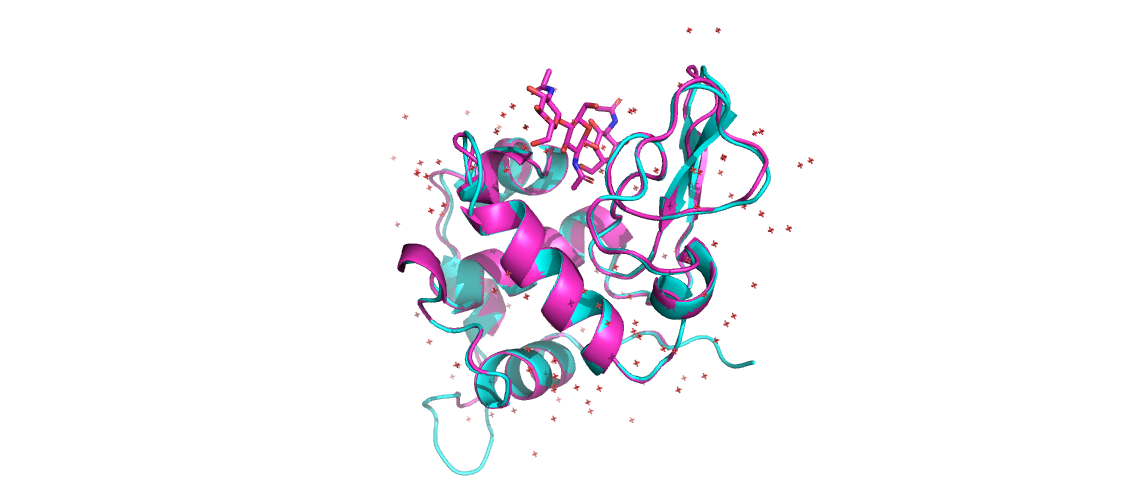

In [27]:
print('ENLYS_BPT5.B99990001.pdb is green')
display(Image('png_1.png', width=600))
print('ENLYS_BPT5.B99990002.pdb is cyan')
display(Image('png_2.png', width=600))

# Добавим его лиганд в белок

In [28]:
#добавляем лиганд
seq_lig = ''
for res in alignm[0].residues:
    seq_lig += res.code
for lig in alignm[1].residues[-3:]:
    seq_lig += lig.code
alignm.append_sequence(seq_lig)

alignm[2].code = 'ENLYS_BPT5_lig'
del alignm[0]

In [29]:
alignm.salign()
alignm.write(file='all_in_one2.ali', alignment_format='PIR')


SALIGN_____> adding the next group to the alignment; iteration    1


In [30]:
! cat all_in_one2.ali


>P1;1lmp
structureX:1lmp.pdb:   1 :A:+129 :A:MOL_ID  1; MOLECULE  LYSOZYME; CHAIN  A; SYNONYM  MUCOPEPTIDE N-ACETYLMURAMYLHYDROLASE; EC  3.2.1.17:MOL_ID  1; ORGANISM_SCIENTIFIC  ONCORHYNCHUS MYKISS; ORGANISM_COMMON  RAINBOW TROUT; ORGANISM_TAXID  8022; ORGAN  KIDNEY: 2.00: 0.16
---KVYDRCELARALKASGMDGYAGNSLPNWVCLSKWESSYNTQATNRNTDGSTDYGIFQINSRYWCDDGRTPGA
KNVCGIRCSQLLTDDLTVAIRCAKRVVLDPNGIGAWVAWRLHCQNQDLRS--------YVAGCGV*

>P1;ENLYS_BPT5_lig
sequence::1    : :+140 : :undefined:undefined:-1.00:-1.00
MSFKFGKNSEKQLATVKPELQKVARRALELSPYDFTIVQGIRTVAQSAQNIANGTSFLKDPSKSKHITGDAIDFA
PYINGKIDWNDLEAFWAVKKAFEQAGKELGIKLRFGADWNASGDYHDEIKRGTYDGGHVELVCGV*


In [31]:
# выбираем объект для моделирования 
s = alignm[1]
pdb = alignm[0]

# создаем объект automodel
a = modeller.automodel.automodel(env, alnfile='all_in_one2.ali', knowns=pdb.code, sequence=s.code)

a.name = 'mod' + s.code
a.starting_model = 1
a.ending_model = 2
a.make()

automodel__W> Topology and/or parameter libraries already in memory. These will
                be used instead of the automodel defaults. If this is not what you
                want, clear them before creating the automodel object with
                env.libs.topology.clear() and env.libs.parameters.clear()

check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
END OF TABLE
mdtrsr__446W> A potential that relies on one protein is used, yet you have at
              least one known structure available. MDT, not library, potential is used.
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies
condens_443_> Restraints marked for deletion were removed.
              T

iupac_m_397W> Atoms were not swapped because of the uncertainty of how to handle the H atom.


>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      140
Number of all, selected real atoms                :     1098    1098
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :    10207   10207
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):     2552
Dynamic pairs routine                             : 2, NATM x NATM cell sorting
Atomic shift for contacts update (UPDATE_DYNAMIC) :    0.390
LENNARD_JONES_SWITCH                              :    6.500   7.500
COULOMB_JONES_SWITCH                              :    6.500   7.500
RESIDUE_SPAN_RANGE                                :        0   99999
NLOGN_USE                             

ENLYS_BPT5_lig.B99990001.pdb is yellow 
Score - 926.23694


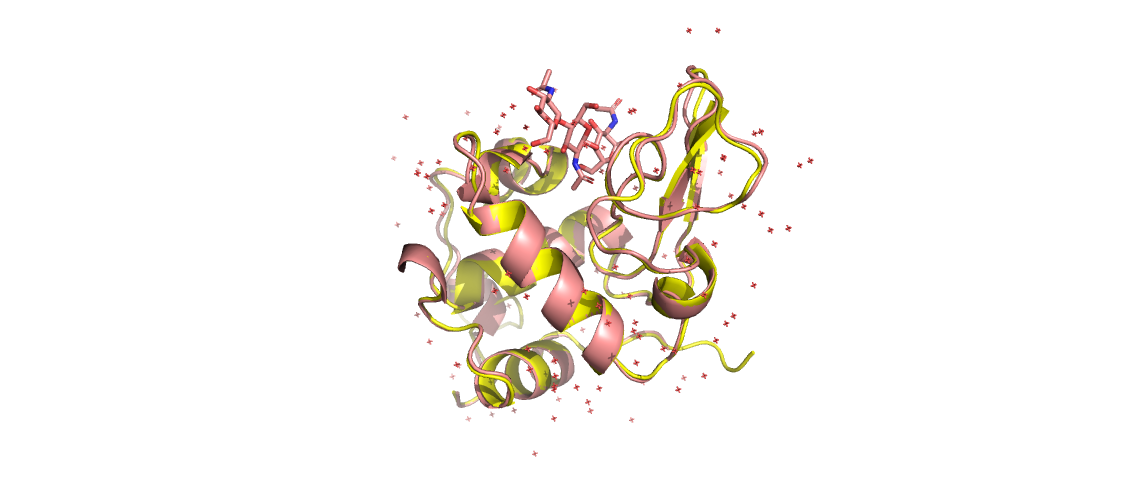

ENLYS_BPT5_lig.B99990002.pdb is grey 
Score - 955.03845


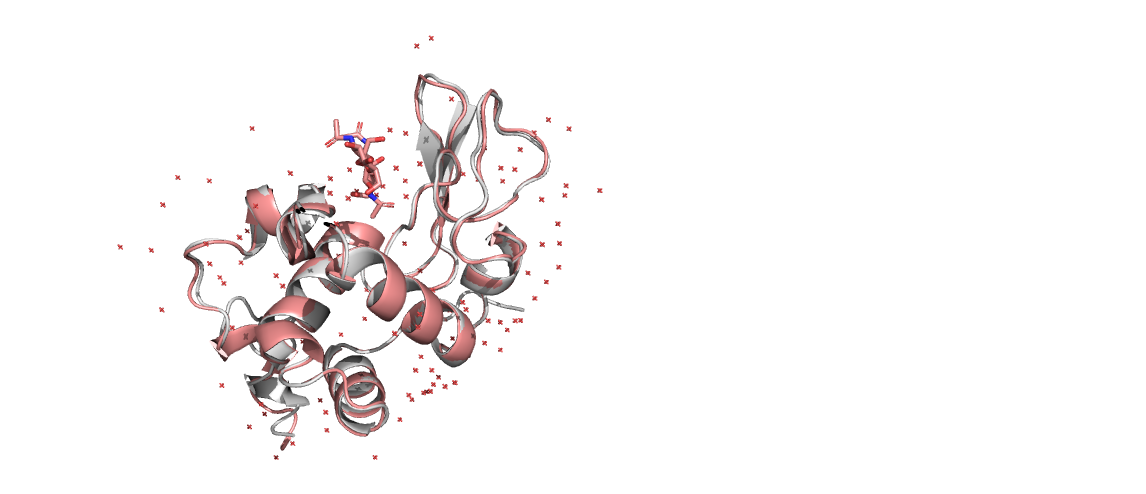

In [32]:
print('ENLYS_BPT5_lig.B99990001.pdb is yellow \nScore - 926.23694')
display(Image('png_3.png', width=600))
print('ENLYS_BPT5_lig.B99990002.pdb is grey \nScore - 955.03845')
display(Image('png_4.png', width=600))

# Переместим лиганд в другое место

In [33]:
! rm ENLYS_BPT5_lig.rsr

In [34]:
class mymodel(modeller.automodel.automodel):
    def special_restraints(self, aln):
        rsr = self.restraints
        at = self.atoms
        for x,y in [('O:123','CA:114')]:
            rsr.add(modeller.forms.gaussian(group=modeller.physical.xy_distance, 
                                            feature=modeller.features.distance(
                                            at[x],at[y]),mean=3.0, stdev=0.1))

from modeller import *
from modeller.automodel import *    
a = mymodel(env, alnfile='all_in_one2.ali', knowns=pdb.code, sequence=s.code)

automodel__W> Topology and/or parameter libraries already in memory. These will
                be used instead of the automodel defaults. If this is not what you
                want, clear them before creating the automodel object with
                env.libs.topology.clear() and env.libs.parameters.clear()


In [35]:
a.name = 'mod' + s.code
a.starting_model = 1
a.ending_model = 2
a.make()


check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
END OF TABLE
mdtrsr__446W> A potential that relies on one protein is used, yet you have at
              least one known structure available. MDT, not library, potential is used.
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies
condens_443_> Restraints marked for deletion were removed.
              Total number of restraints before, now:    11184    10208
iupac_m_397W> Atoms were not swapped because of the uncertainty of how to handle the H atom.
iupac_m_397W> Atoms were not swapped because of the uncertainty of how to handle the H atom.


>> ENERGY; Differences between the model's features and restraints:

iupac_m_397W> Atoms were not swapped because of the uncertainty of how to handle the H atom.
iupac_m_397W> Atoms were not swapped because of the uncertainty of how to handle the H atom.


>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      140
Number of all, selected real atoms                :     1098    1098
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :    10208   10208
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):     2629
Dynamic pairs routine                             : 2, NATM x NATM cell sorting
Atomic shift for contacts update (UPDATE_DYNAMIC) :    0.390
LENNARD_JONES_SWITCH                              :    6.500   7.500
COULOMB_JONES_SWITCH                              :    6.500   7.500
RESIDUE_SPAN_R

ENLYS_BPT5_lig.B99990001.pdb is purple


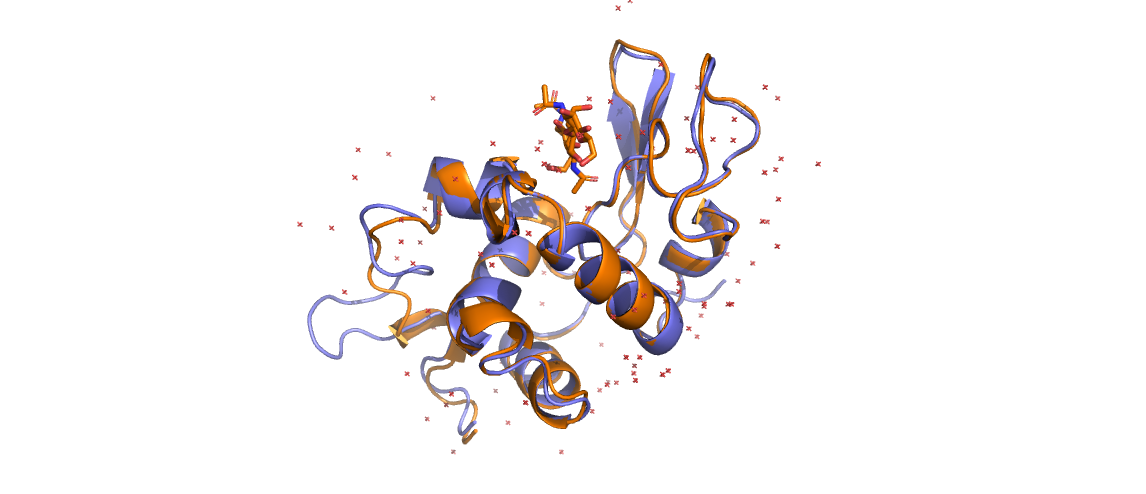

ENLYS_BPT5_lig.B99990002.pdb is light-green


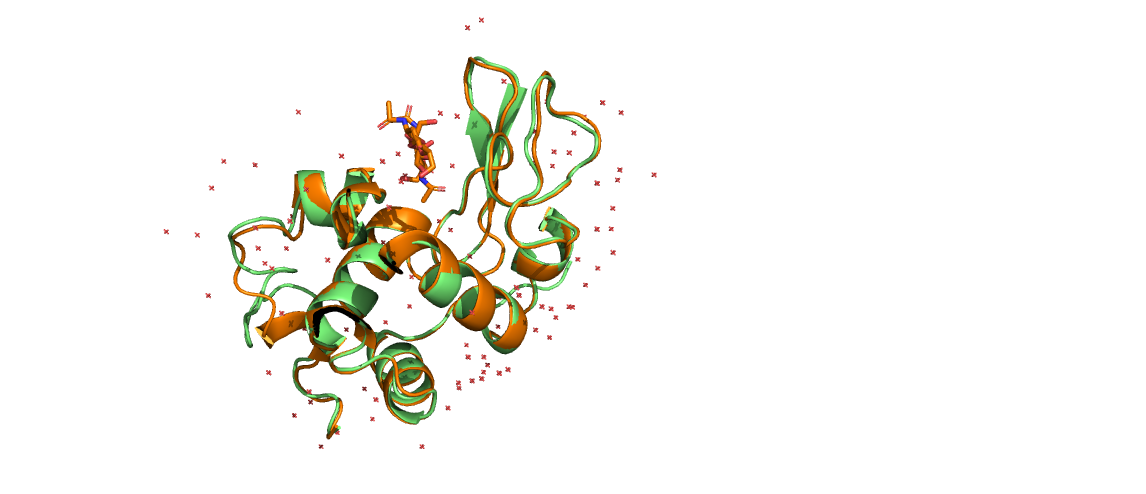

In [36]:
print('ENLYS_BPT5_lig.B99990001.pdb is purple')
display(Image('png_5.png', width=600))
print('ENLYS_BPT5_lig.B99990002.pdb is light-green')
display(Image('png_6.png', width=600))

# Заменим всех аминокислот на Ala

In [37]:
alignm = modeller.alignment(env)

mdl = modeller.model(env, file='1lmp.pdb', model_segment=('FIRST:'+'A', 'LAST:'+'A'))
alignm.append_model(mdl, atom_files='1lmp.pdb', align_codes='1lmp')

ala_prot = 'A' * 120 + '...'
alignm.append_sequence(ala_prot)
alignm[0].code = 'pdb'
alignm[1].code = 'ala_changed'

In [38]:
alignm.salign()
alignm.write(file='align_ala.ali', alignment_format='PIR')


SALIGN_____> adding the next group to the alignment; iteration    1


In [39]:
## Выбираем объект для моделирования 
s = alignm[1]
pdb = alignm[0]

print(s.code, pdb.code)

## Создаем объект automodel
a = modeller.automodel.automodel(env, alnfile='align_ala.ali', knowns=pdb.code, sequence=s.code)

a.name = 'mod' + s.code
a.starting_model = 1
a.ending_model = 2
a.make()

ala_changed pdb
automodel__W> Topology and/or parameter libraries already in memory. These will
                be used instead of the automodel defaults. If this is not what you
                want, clear them before creating the automodel object with
                env.libs.topology.clear() and env.libs.parameters.clear()

check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
    110     1  110   117      A     A   12.552
END OF TABLE
buildc__467W> All coordinates in MODEL have been assigned.
buildc__468W> Some coordinates in MODEL are still undefined.
buildc__467W> All coordinates in MODEL have been assigned.
buildc__468W> Some coordinates in MODEL are still undefined.
invent__526W> Inventing the mainchain model coordinates.
generat_607W> Cannot find params in params file:
              CHARMM atoms :  C U



>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      123
Number of all, selected real atoms                :      618     618
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :     7602    7602
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):     1064
Dynamic pairs routine                             : 2, NATM x NATM cell sorting
Atomic shift for contacts update (UPDATE_DYNAMIC) :    0.390
LENNARD_JONES_SWITCH                              :    6.500   7.500
COULOMB_JONES_SWITCH                              :    6.500   7.500
RESIDUE_SPAN_RANGE                                :        0   99999
NLOGN_USE                                         :       15
CONTACT_SHELL                                     :    4.000
DYNAMIC_P



>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      123
Number of all, selected real atoms                :      618     618
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :     7602    7602
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):     1065
Dynamic pairs routine                             : 2, NATM x NATM cell sorting
Atomic shift for contacts update (UPDATE_DYNAMIC) :    0.390
LENNARD_JONES_SWITCH                              :    6.500   7.500
COULOMB_JONES_SWITCH                              :    6.500   7.500
RESIDUE_SPAN_RANGE                                :        0   99999
NLOGN_USE                                         :       15
CONTACT_SHELL                                     :    4.000
DYNAMIC_P

ala_changed.B99990001.pdb is pink


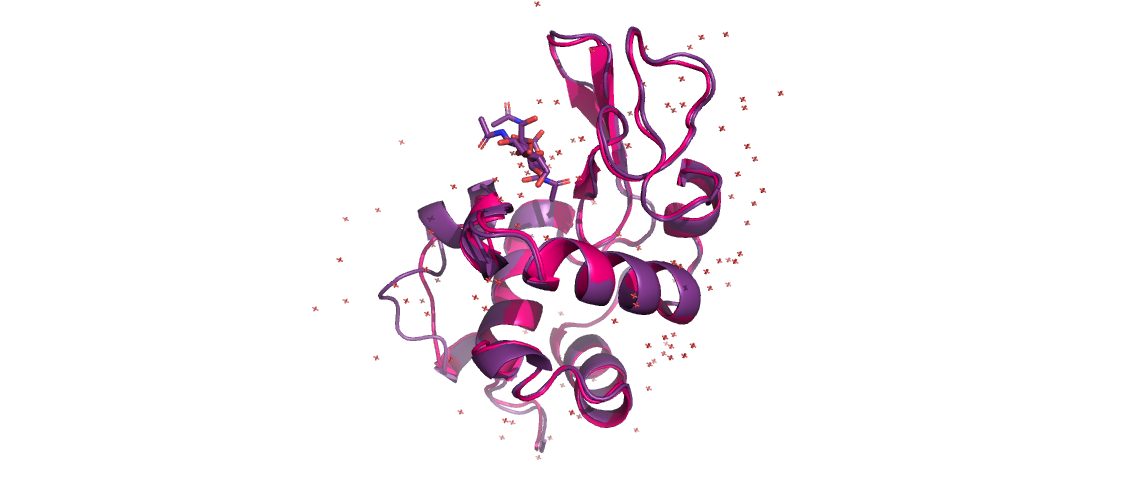

ala_changed.B99990002.pdb is blue


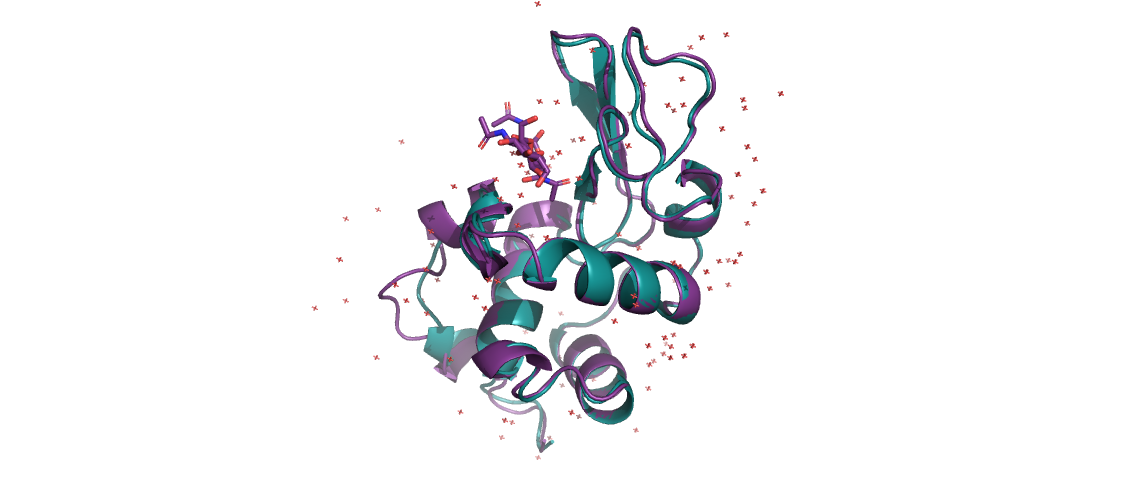

In [40]:
print('ala_changed.B99990001.pdb is pink')
display(Image('png_7.png', width=600))
print('ala_changed.B99990002.pdb is blue')
display(Image('png_8.png', width=600))